In [ ]:
import os
from PIL import Image

# 定义主文件夹路径
main_folder = '/Users/naivecynics/SUSTech/CS405_Machine_Learning/project/bad_image'  # 修改为你的主文件夹路径
categories = ['1光照', '2视角', '3模糊', '4遮挡']


# 遍历每个类别文件夹
for category in categories:
    category_path = os.path.join(main_folder, category)
    
    if os.path.exists(category_path):
        # 获取文件夹中的图片文件
        images = sorted([f for f in os.listdir(category_path) if f.endswith(('jpg', 'png', 'jpeg'))])
        
        # 确保至少有四张图片
        if len(images) >= 4:
            # 打开四张图片
            imgs = [Image.open(os.path.join(category_path, images[i])) for i in range(4)]
            
            # 确定每张图片的大小（以第一张图片为基准）
            width, height = imgs[0].size
            
            # 创建空白画布，大小为 2x2 的图片拼接结果
            new_img = Image.new('RGB', (width * 2, height * 2))
            
            # 将四张图片粘贴到画布上
            new_img.paste(imgs[0], (0, 0))  # 左上
            new_img.paste(imgs[1], (width, 0))  # 右上
            new_img.paste(imgs[2], (0, height))  # 左下
            new_img.paste(imgs[3], (width, height))  # 右下
            
            # 保存拼接后的图片到原文件夹
            output_path = os.path.join(category_path, 'combined_2x2.jpg')
            new_img.save(output_path)
            print(f"Saved combined image to: {output_path}")
        else:
            print(f"Not enough images in folder: {category_path}")
    else:
        print(f"Folder not found: {category_path}")

Saved combined image to: /Users/naivecynics/SUSTech/CS405_Machine_Learning/project/bad_image/1光照/combined_2x2.jpg
Saved combined image to: /Users/naivecynics/SUSTech/CS405_Machine_Learning/project/bad_image/2视角/combined_2x2.jpg
Saved combined image to: /Users/naivecynics/SUSTech/CS405_Machine_Learning/project/bad_image/3模糊/combined_2x2.jpg
Saved combined image to: /Users/naivecynics/SUSTech/CS405_Machine_Learning/project/bad_image/4遮挡/combined_2x2.jpg


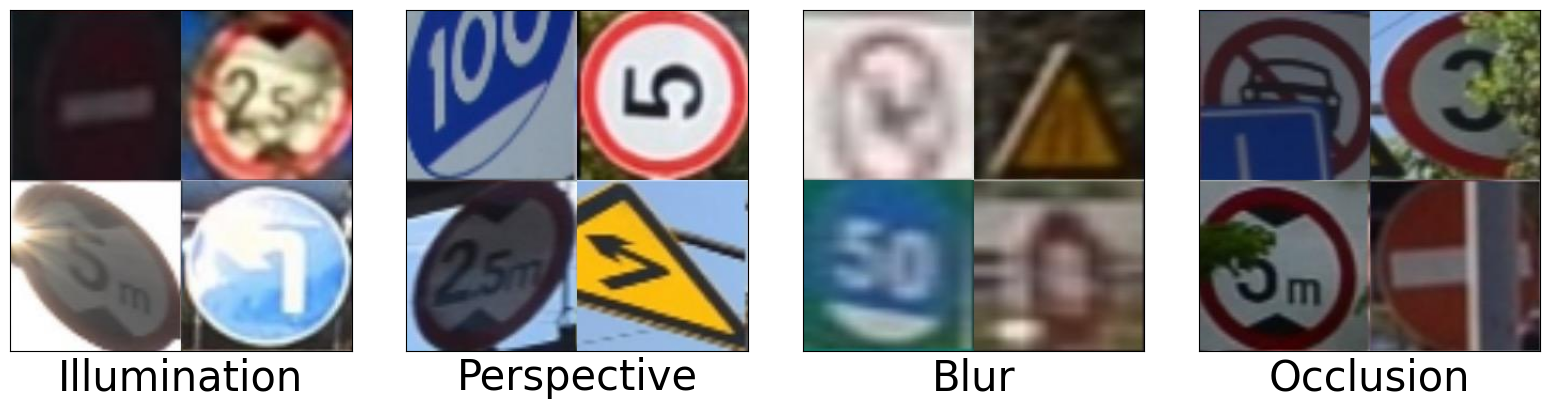

In [20]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 定义主文件夹路径
main_folder = './'  # 修改为你的主文件夹路径
categories = ['1光照', '2视角', '3模糊', '4遮挡']
kinds = ['Illumination', 'Perspective', 'Blur', 'Occlusion']

# 创建图表：1行4列的子图
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 遍历每个类别文件夹，加载2x2拼接图片
for idx, category in enumerate(categories):
    category_path = os.path.join(main_folder, category)
    combined_image_path = os.path.join(category_path, 'combined_2x2.jpg')
    
    if os.path.exists(combined_image_path):
        # 读取拼接好的图片
        img = imread(combined_image_path)
        axes[idx].imshow(img)
        # axes[idx].set_title(f"Category {idx+1}", fontsize=10)  # 标题为类别编号
    else:
        # 如果图片不存在，显示占位文本
        axes[idx].text(0.5, 0.5, 'Image not found', fontsize=12, ha='center', va='center')
        axes[idx].axis('off')  # 隐藏坐标轴
        continue
    
    # 设置坐标轴
    axes[idx].set_xticks([])  # 隐藏x轴刻度
    axes[idx].set_yticks([])  # 隐藏y轴刻度
    axes[idx].spines['top'].set_visible(True)
    axes[idx].spines['right'].set_visible(True)

    # 图片下方添加类别名称
    axes[idx].set_xlabel(f'{kinds[idx]}', fontsize=30)

# 调整布局
plt.tight_layout()
plt.savefig('bad.jpg')
plt.show()